## Gradient Descent Implementation #4
Here we attempt to use our basic implementation of gradient descent to estimate parameters for classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

Here we setup data with 1 feature and 2 classes based on which side of the line the data falls.  The prediction task will be to determine the parameters of the line that best seperates the data into 2 classes.

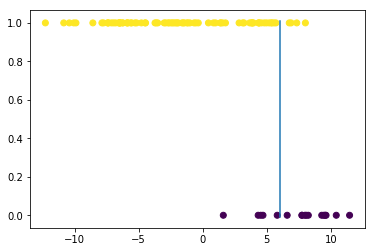

In [2]:
n = 100
xs = np.random.uniform(-10, 10, n)

decision_boundary = 6.

#classes
y = (xs < decision_boundary).astype(int)

#add noise to data
xs = xs + np.random.normal(0, 2, n)

plt.axvline(x=decision_boundary, ymin=0.05, ymax=0.95)
plt.scatter(xs, y, c=y)
plt.show()

final cost:         0.21829183170248265
estimated params:   [ 3.02848389 -0.46562273]
estimated boundary: 6.504158210784538
expected boundary:  6.0


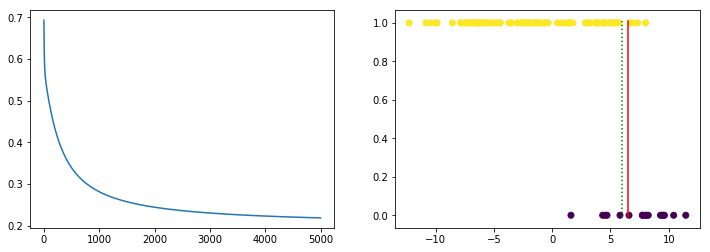

In [3]:
learning_rate = 1e-2
iterations = 5000
num_params = 2

def sigmoid(x, theta):
    z = x @ theta
    return 1. / (1. + np.exp(-z))

def cost(yp, y):
    N = len(y)
    return -1./N * (y @ np.log(yp) + (1.-y) @ np.log(1.-yp))

x = np.stack([np.ones(n), xs], axis=1)
#x_scaled = preprocessing.scale(x)
x_scaled = x
thetas = np.zeros(num_params)
costs = []

for _ in range(iterations):
    yp = sigmoid(x_scaled, thetas)
    costs.append(cost(yp, y))
    gradient = (yp - y) @ x_scaled / n
    thetas -= learning_rate*gradient

#using a threshold of .5
estimated_boundary = -thetas[0] / thetas[1]

print("final cost:        ", costs[-1])
print("estimated params:  ", thetas)
print("estimated boundary:", estimated_boundary)
print("expected boundary: ", decision_boundary)

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(costs)

ax2.axvline(x=decision_boundary, ymin=0.05, ymax=0.95, color='green', linestyle=':')
ax2.axvline(x=estimated_boundary, ymin=0.05, ymax=0.95, color='red')
ax2.scatter(xs, y, c=y)

plt.show()